In [3]:
import pandas as pd
sarc_data = pd.read_csv('/Users/Patron/Documents/501 Text Mining/Project sarcasm detection /train-balanced-sarcasm.csv')
print(sarc_data.head())

  label                                            comment     author  \
0     0                                         NC and NH.  Trumpbart   
1     0  You do know west teams play against west teams...  Shbshb906   
2     0  They were underdogs earlier today, but since G...   Creepeth   
3     0  This meme isn't funny none of the "new york ni...  icebrotha   
4     0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date     created_utc  \
0            politics    2.0 -1.0   -1.0  2016-10  10/16/16 23:55   
1                 nba   -4.0 -1.0   -1.0  2016-11   11/1/16 00:24   
2                 nfl    3.0  3.0    0.0  2016-09   9/22/16 21:45   
3  BlackPeopleTwitter   -8.0 -1.0   -1.0  2016-10  10/18/16 21:03   
4  MaddenUltimateTeam    6.0 -1.0   -1.0  2016-12  12/30/16 17:00   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  
1  The blazers and Mavericks (The we

/var/folders/v7/2nhb67rd1_sbmn0ffd6c08l00000gn/T/ipykernel_15994/1031365142.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sarc_data = pd.read_csv('/Users/Patron/Documents/501 Text Mining/Project sarcasm detection /train-balanced-sarcasm.csv')


In [30]:
!pip install nltk


zsh:1: command not found: pip


In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [32]:
sarc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010826
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   label           1010771 non-null  object 
 1   comment         1010771 non-null  object 
 2   author          1010771 non-null  object 
 3   subreddit       1010771 non-null  object 
 4   score           1010771 non-null  float64
 5   ups             1010771 non-null  float64
 6   downs           1010771 non-null  float64
 7   date            1010771 non-null  object 
 8   created_utc     1010771 non-null  object 
 9   parent_comment  1010771 non-null  object 
dtypes: float64(3), object(7)
memory usage: 84.8+ MB


In [33]:
sarc_data.dtypes

label              object
comment            object
author             object
subreddit          object
score             float64
ups               float64
downs             float64
date               object
created_utc        object
parent_comment     object
dtype: object

In [34]:
import pandas as pd
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [35]:
# Load the full dataset
sarc_data = pd.read_csv('/Users/Patron/Documents/501 Text Mining/Project sarcasm detection /train-balanced-sarcasm.csv')

# 1. Drop rows with missing 'comment' values
sarc_data.dropna(subset=['comment'], inplace=True)
sarc_data.info()

/var/folders/v7/2nhb67rd1_sbmn0ffd6c08l00000gn/T/ipykernel_15994/4033758823.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sarc_data = pd.read_csv('/Users/Patron/Documents/501 Text Mining/Project sarcasm detection /train-balanced-sarcasm.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010826
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   label           1010771 non-null  object 
 1   comment         1010771 non-null  object 
 2   author          1010771 non-null  object 
 3   subreddit       1010771 non-null  object 
 4   score           1010771 non-null  float64
 5   ups             1010771 non-null  float64
 6   downs           1010771 non-null  float64
 7   date            1010771 non-null  object 
 8   created_utc     1010771 non-null  object 
 9   parent_comment  1010771 non-null  object 
dtypes: float64(3), object(7)
memory usage: 84.8+ MB


In [36]:
# 2. Convert 'label' column to integer type (0 for non-sarcastic, 1 for sarcastic)
sarc_data['label'] = sarc_data['label'].astype(int)
sarc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010826
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   label           1010771 non-null  int64  
 1   comment         1010771 non-null  object 
 2   author          1010771 non-null  object 
 3   subreddit       1010771 non-null  object 
 4   score           1010771 non-null  float64
 5   ups             1010771 non-null  float64
 6   downs           1010771 non-null  float64
 7   date            1010771 non-null  object 
 8   created_utc     1010771 non-null  object 
 9   parent_comment  1010771 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 84.8+ MB


In [37]:
import re
import string

# Define a list of common stopwords manually to avoid NLTK dependency
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
    "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
    "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during", "before",
    "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over",
    "under", "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can",
    "will", "just", "don", "should", "now"
])

def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords manually
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

# Apply this function to your dataset columns
sarc_data['comment_cleaned'] = sarc_data['comment'].apply(clean_text)
sarc_data['parent_comment_cleaned'] = sarc_data['parent_comment'].apply(clean_text)
sarc_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,comment_cleaned,parent_comment_cleaned
0,0,NC and NH.,Trumpbart,politics,2.0,-1.0,-1.0,2016-10,10/16/16 23:55,"Yeah, I get that argument. At this point, I'd ...",nc nh,yeah get argument point id prefer lived nc well
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,-1.0,-1.0,2016-11,11/1/16 00:24,The blazers and Mavericks (The wests 5 and 6 s...,know west teams play west teams east teams right,blazers mavericks wests 5 6 seed even carry go...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,3.0,0.0,2016-09,9/22/16 21:45,They're favored to win.,underdogs earlier today since gronks announcem...,theyre favored win
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,-1.0,-1.0,2016-10,10/18/16 21:03,deadass don't kill my buzz,meme isnt funny none new york nigga ones,deadass dont kill buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,-1.0,-1.0,2016-12,12/30/16 17:00,Yep can confirm I saw the tool they use for th...,could use one tools,yep confirm saw tool use made boy easportsmut


In [38]:
# 4. Drop any remaining duplicates based on 'comment_cleaned'
sarc_data.drop_duplicates(subset=['comment_cleaned'], inplace=True)
sarc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905756 entries, 0 to 1010826
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   label                   905756 non-null  int64  
 1   comment                 905756 non-null  object 
 2   author                  905756 non-null  object 
 3   subreddit               905756 non-null  object 
 4   score                   905756 non-null  float64
 5   ups                     905756 non-null  float64
 6   downs                   905756 non-null  float64
 7   date                    905756 non-null  object 
 8   created_utc             905756 non-null  object 
 9   parent_comment          905756 non-null  object 
 10  comment_cleaned         905756 non-null  object 
 11  parent_comment_cleaned  905756 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 89.8+ MB


In [39]:
# 5. Split data into training and test sets (80% train, 20% test)
train_data, test_data = train_test_split(sarc_data, test_size=0.2, random_state=42, stratify=sarc_data['label'])

# Display basic info to confirm cleaning and splitting
print(f"Training set size: {train_data.shape}")
print(f"Test set size: {test_data.shape}")

Training set size: (724604, 12)
Test set size: (181152, 12)


In [40]:
print(train_data.head())

        label                                            comment  \
950336      0  Not quite what I would expect in this sub... b...   
336434      0                     I think he went for the memes.   
347812      0  He's just another media hog who will jump ship...   
887846      1            Yeah I guess JJ Watt turned out alright   
788876      1  Yeah, fuck them for not having the same mind a...   

               author        subreddit  score  ups  downs     date  \
950336         Talynn     progresspics    4.0  4.0    0.0  2013-11   
336434      GameChaos  GlobalOffensive    1.0  1.0    0.0  2016-06   
347812      BamaFlava       The_Donald    1.0  1.0    0.0  2016-06   
887846     Renegade56              nfl    1.0  1.0    0.0  2014-05   
788876  Sensus1Cookus    SquaredCircle    8.0  8.0    0.0  2014-12   

           created_utc                                     parent_comment  \
950336  11/15/13 01:06  From r/cats: "Weight loss journey, before and ...   
336434   6/14/16

In [41]:
pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

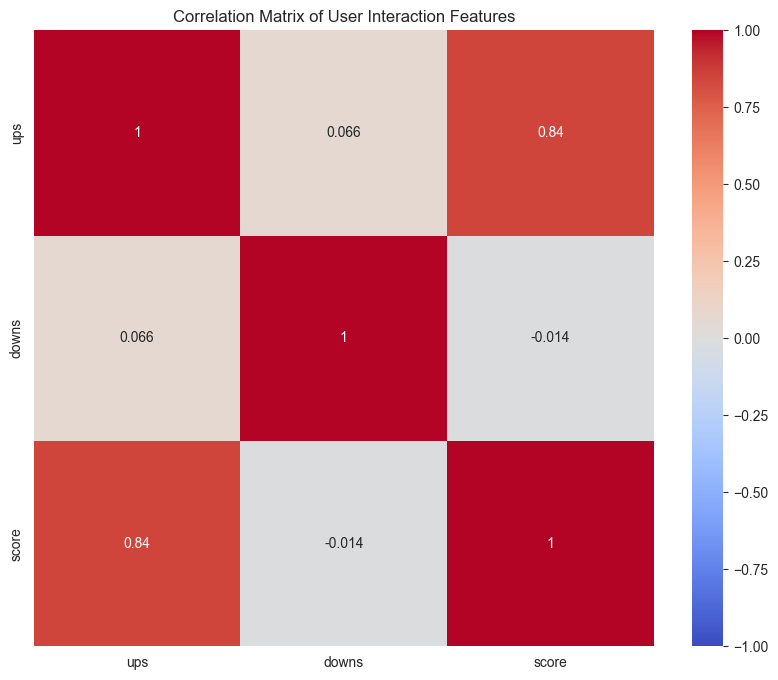

In [43]:
# Plot the correlation matrix of numerical features
corr_matrix = sarc_data[['ups', 'downs', 'score']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of User Interaction Features")
plt.show()

<Axes: >

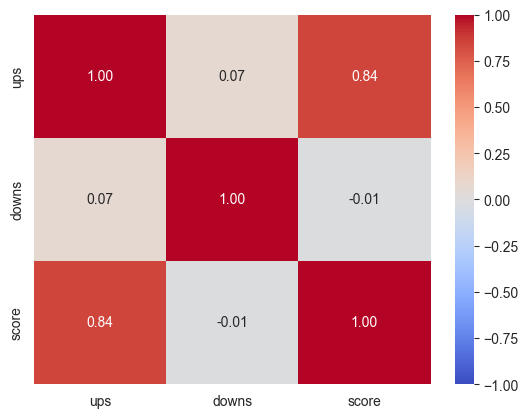

In [44]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

In [45]:
# Word cloud for sarcastic vs non-sarcastic comments
sarcastic_comments = ' '.join(sarc_data[sarc_data['label'] == 1]['comment_cleaned'])
non_sarcastic_comments = ' '.join(sarc_data[sarc_data['label'] == 0]['comment_cleaned'])

wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(sarcastic_comments)
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(non_sarcastic_comments)

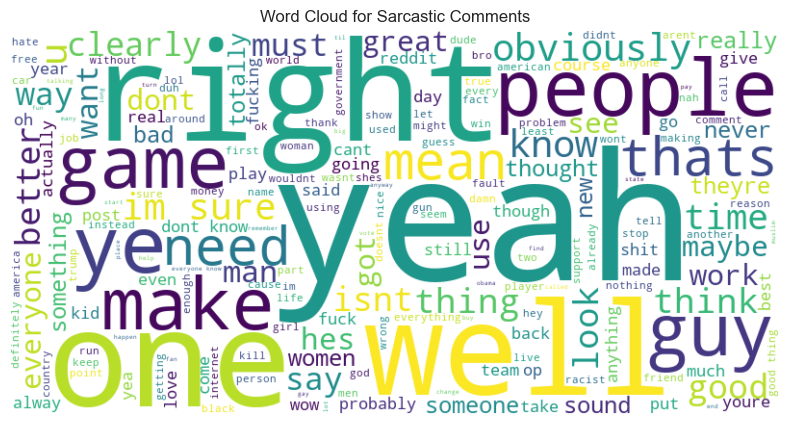

In [46]:
# Plot word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Sarcastic Comments')
plt.axis('off')
plt.show()

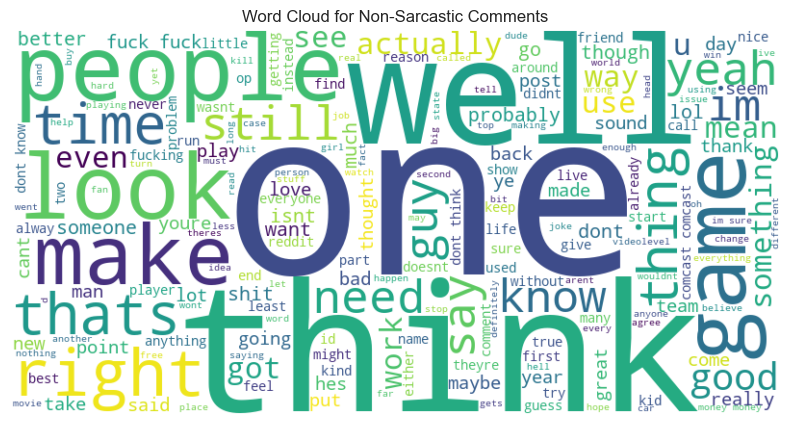

In [47]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Non-Sarcastic Comments')
plt.axis('off')
plt.show()

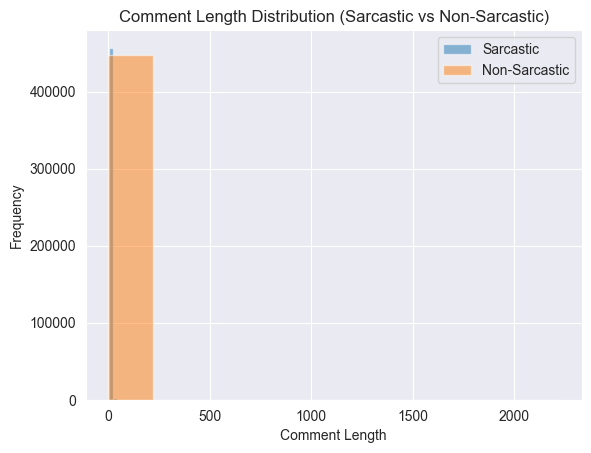

In [48]:
# Distribution of comment length
sarc_data['comment_length'] = sarc_data['comment_cleaned'].apply(lambda x: len(x.split()))
plt.hist(sarc_data[sarc_data['label'] == 1]['comment_length'], alpha=0.5, label='Sarcastic')
plt.hist(sarc_data[sarc_data['label'] == 0]['comment_length'], alpha=0.5, label='Non-Sarcastic')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Comment Length Distribution (Sarcastic vs Non-Sarcastic)')
plt.show()

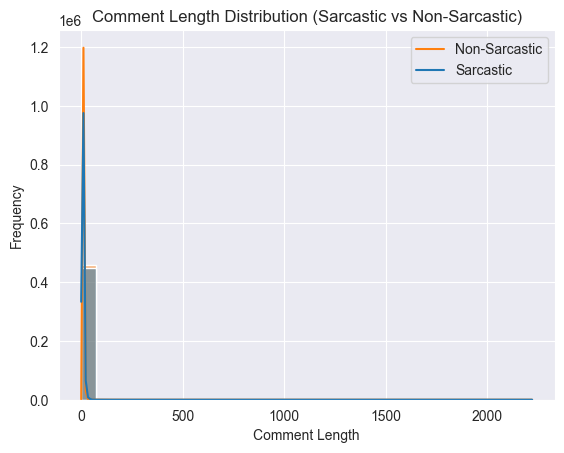

In [49]:
sns.histplot(data=sarc_data, x='comment_length', hue='label', kde=True, bins=30)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.legend(['Non-Sarcastic', 'Sarcastic'], loc='upper right')
plt.title('Comment Length Distribution (Sarcastic vs Non-Sarcastic)')
plt.show()

In [50]:
# Create the comment_length column if it doesn't exist
train_data['comment_length'] = train_data['comment_cleaned'].apply(lambda x: len(x.split()))

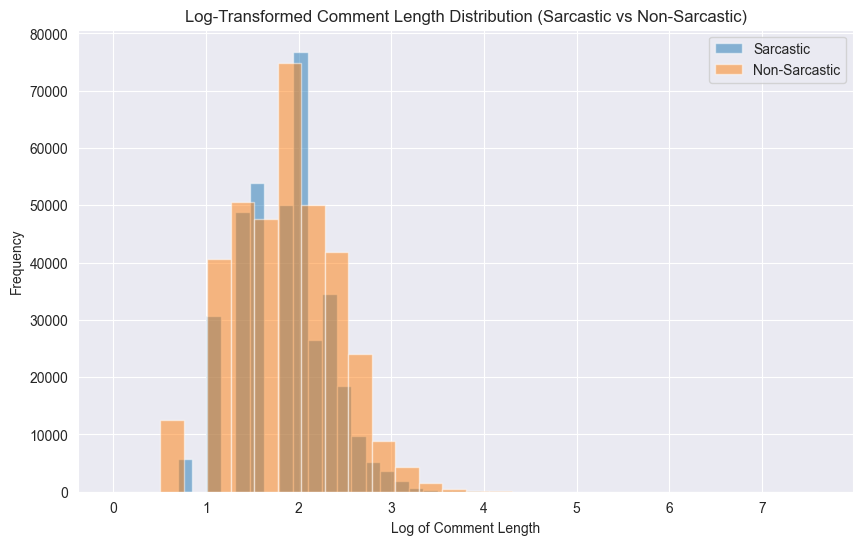

In [51]:
# Log-transform comment length to reduce skewness
import numpy as np
train_data['log_comment_length'] = np.log1p(train_data['comment_length'])

plt.figure(figsize=(10, 6))
plt.hist(train_data[train_data['label'] == 1]['log_comment_length'], alpha=0.5, label='Sarcastic', bins=30)
plt.hist(train_data[train_data['label'] == 0]['log_comment_length'], alpha=0.5, label='Non-Sarcastic', bins=30)
plt.xlabel('Log of Comment Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Log-Transformed Comment Length Distribution (Sarcastic vs Non-Sarcastic)')
plt.show()

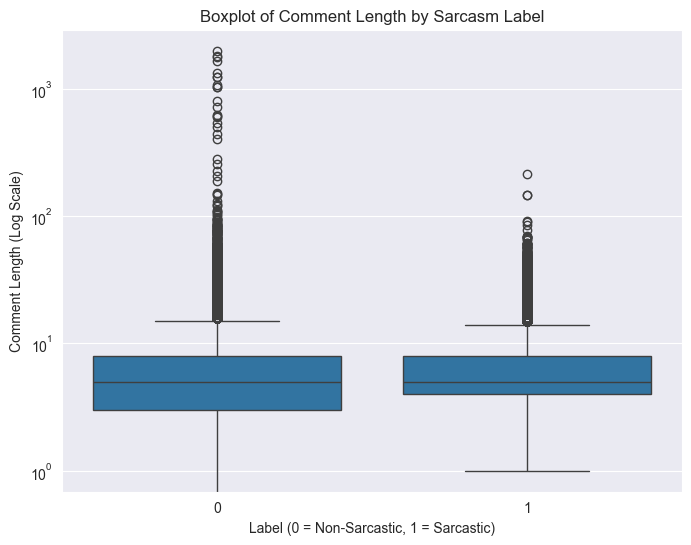

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='comment_length', data=train_data)
plt.yscale('log')
plt.xlabel('Label (0 = Non-Sarcastic, 1 = Sarcastic)')
plt.ylabel('Comment Length (Log Scale)')
plt.title('Boxplot of Comment Length by Sarcasm Label')
plt.show()

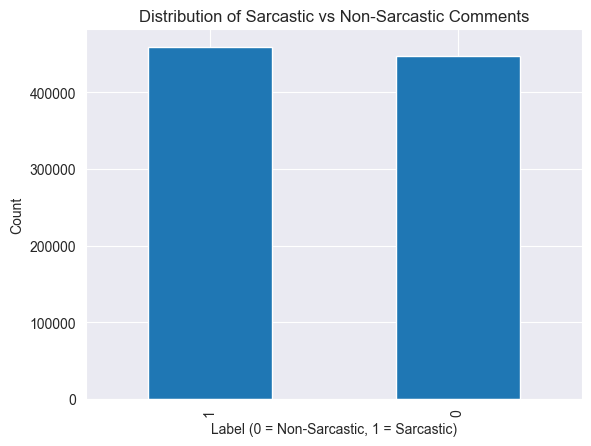

In [53]:
# Distribution of sarcastic (1) vs non-sarcastic (0) comments
sarc_data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sarcastic vs Non-Sarcastic Comments')
plt.xlabel('Label (0 = Non-Sarcastic, 1 = Sarcastic)')
plt.ylabel('Count')
plt.show()

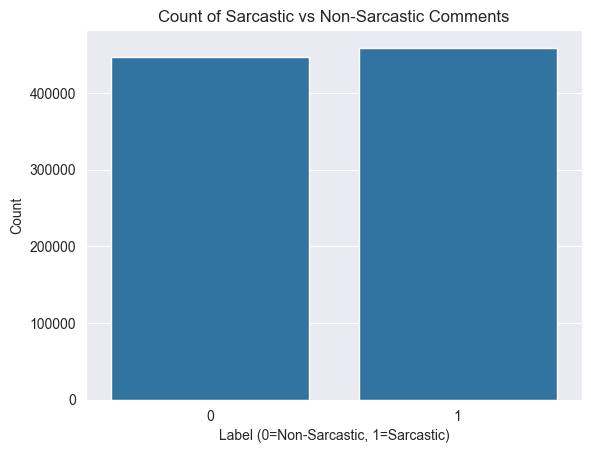

In [54]:
sns.countplot(data=sarc_data, x='label')
plt.title('Count of Sarcastic vs Non-Sarcastic Comments')
plt.xlabel('Label (0=Non-Sarcastic, 1=Sarcastic)')
plt.ylabel('Count')
plt.show()

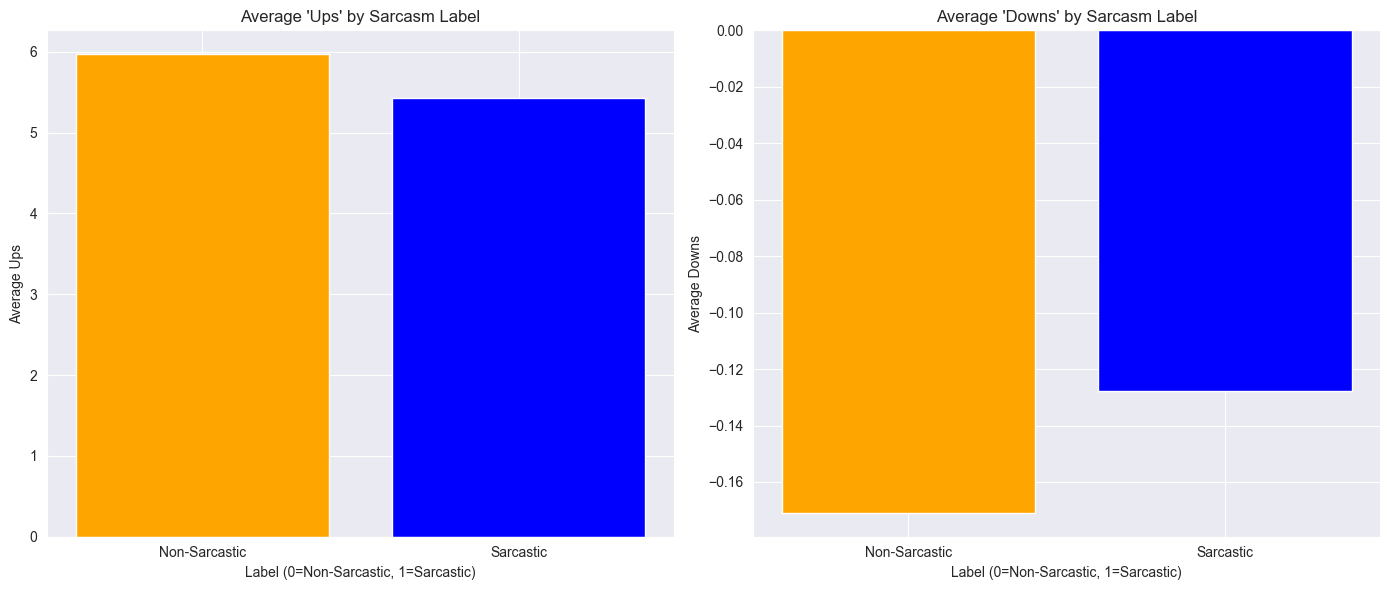

In [55]:
import matplotlib.pyplot as plt

# Calculate the mean of 'ups' and 'downs' grouped by label
mean_interaction = sarc_data.groupby('label')[['ups', 'downs']].mean()

# Plot bar charts for average 'ups' and 'downs' by label
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Average ups plot
axes[0].bar(mean_interaction.index, mean_interaction['ups'], color=['orange', 'blue'])
axes[0].set_title("Average 'Ups' by Sarcasm Label")
axes[0].set_xlabel("Label (0=Non-Sarcastic, 1=Sarcastic)")
axes[0].set_ylabel("Average Ups")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Sarcastic', 'Sarcastic'])

# Average downs plot
axes[1].bar(mean_interaction.index, mean_interaction['downs'], color=['orange', 'blue'])
axes[1].set_title("Average 'Downs' by Sarcasm Label")
axes[1].set_xlabel("Label (0=Non-Sarcastic, 1=Sarcastic)")
axes[1].set_ylabel("Average Downs")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-Sarcastic', 'Sarcastic'])

plt.tight_layout()
plt.show()

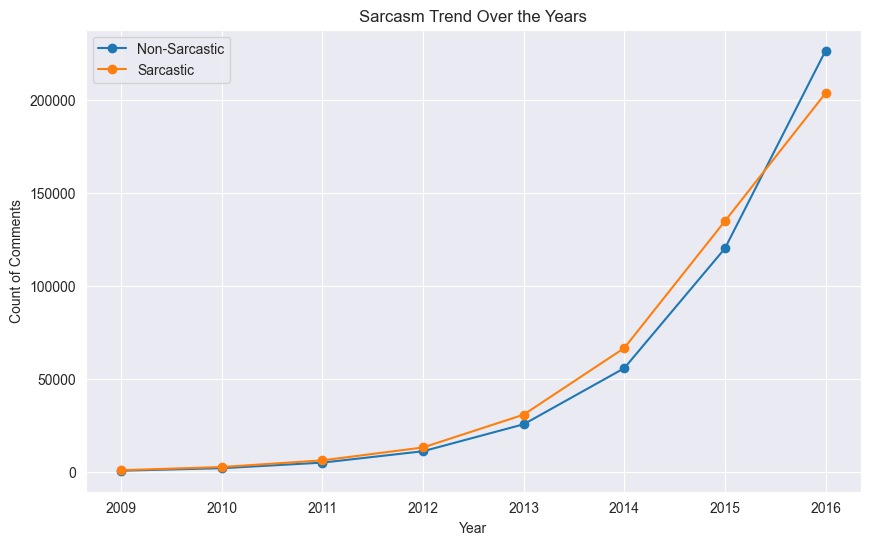

In [56]:
import matplotlib.pyplot as plt

# Extract year from the date column if it's in a recognizable format (e.g., YYYY-MM)
sarc_data['year'] = pd.to_datetime(sarc_data['date'], errors='coerce').dt.year

# Plot sarcasm trends over the years
yearly_sarcasm = sarc_data.groupby(['year', 'label']).size().unstack()
yearly_sarcasm.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Sarcasm Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Comments")
plt.legend(["Non-Sarcastic", "Sarcastic"])
plt.show()


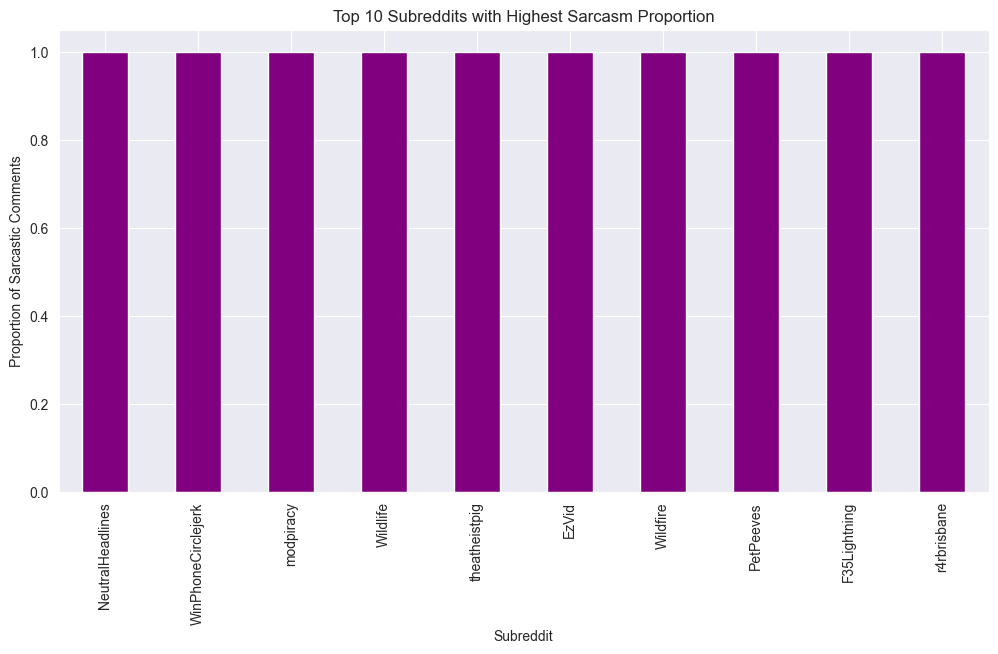

In [57]:
# Calculate sarcasm proportions by subreddit
subreddit_sarcasm = sarc_data.groupby('subreddit')['label'].mean().sort_values(ascending=False)

# Plot top 10 subreddits with the highest sarcasm proportion
top_10_sarcastic_subreddits = subreddit_sarcasm.head(10)
top_10_sarcastic_subreddits.plot(kind='bar', color='purple', figsize=(12, 6))
plt.title("Top 10 Subreddits with Highest Sarcasm Proportion")
plt.xlabel("Subreddit")
plt.ylabel("Proportion of Sarcastic Comments")
plt.show()

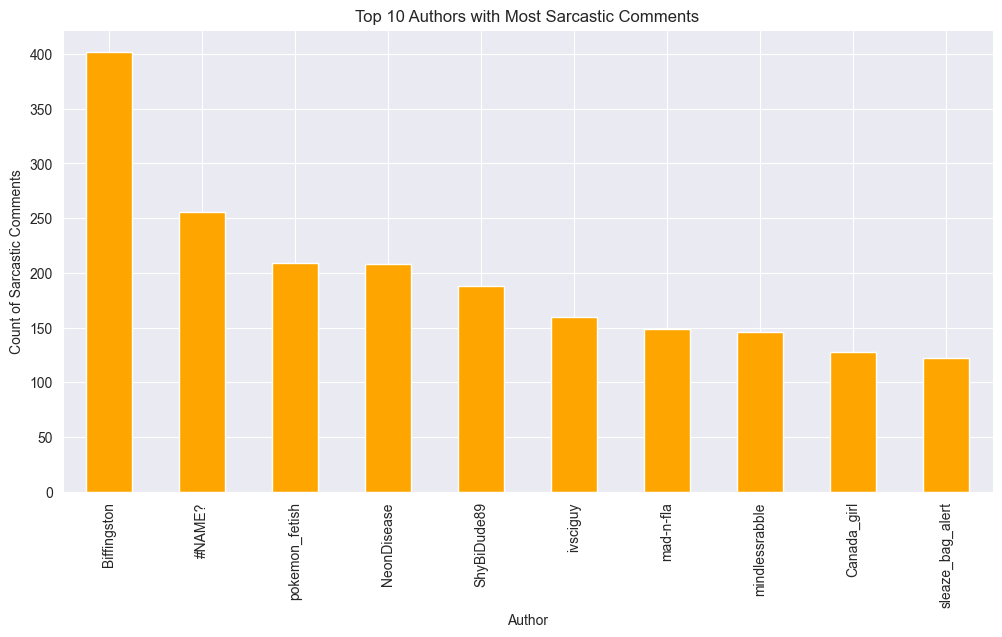

In [58]:
# Count sarcastic comments by author
author_sarcasm_counts = sarc_data[sarc_data['label'] == 1].groupby('author').size().sort_values(ascending=False)

# Plot top 10 authors with the most sarcastic comments
top_10_sarcastic_authors = author_sarcasm_counts.head(10)
top_10_sarcastic_authors.plot(kind='bar', color='orange', figsize=(12, 6))
plt.title("Top 10 Authors with Most Sarcastic Comments")
plt.xlabel("Author")
plt.ylabel("Count of Sarcastic Comments")
plt.show()

In [59]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


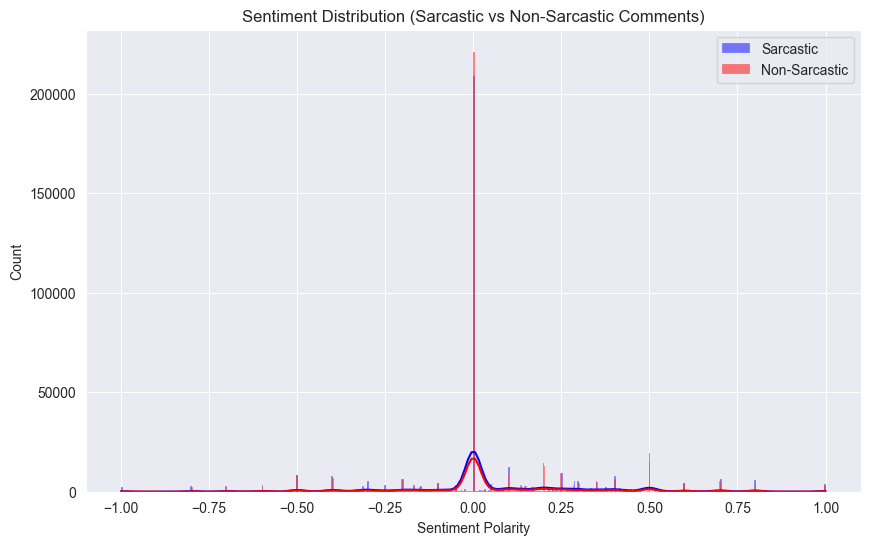

In [60]:
from textblob import TextBlob

# Calculate sentiment polarity for sarcastic and non-sarcastic comments
sarc_data['sentiment'] = sarc_data['comment_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution for sarcastic vs non-sarcastic comments
plt.figure(figsize=(10, 6))
sns.histplot(sarc_data[sarc_data['label'] == 1]['sentiment'], color="blue", kde=True, label="Sarcastic")
sns.histplot(sarc_data[sarc_data['label'] == 0]['sentiment'], color="red", kde=True, label="Non-Sarcastic")
plt.title("Sentiment Distribution (Sarcastic vs Non-Sarcastic Comments)")
plt.xlabel("Sentiment Polarity")
plt.legend()
plt.show()

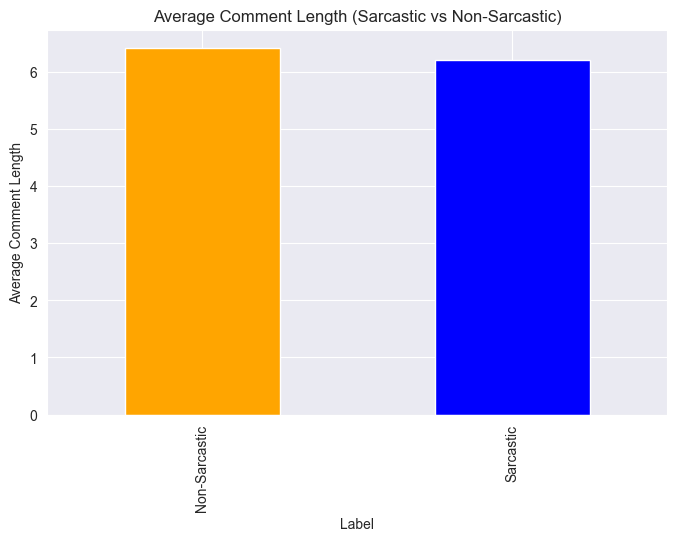

In [61]:
# Calculate the average comment length for each label
avg_length = sarc_data.groupby('label')['comment_length'].mean()
avg_length.index = ['Non-Sarcastic', 'Sarcastic']

# Plot average comment length
avg_length.plot(kind='bar', color=['orange', 'blue'], figsize=(8, 5))
plt.title("Average Comment Length (Sarcastic vs Non-Sarcastic)")
plt.xlabel("Label")
plt.ylabel("Average Comment Length")
plt.show()

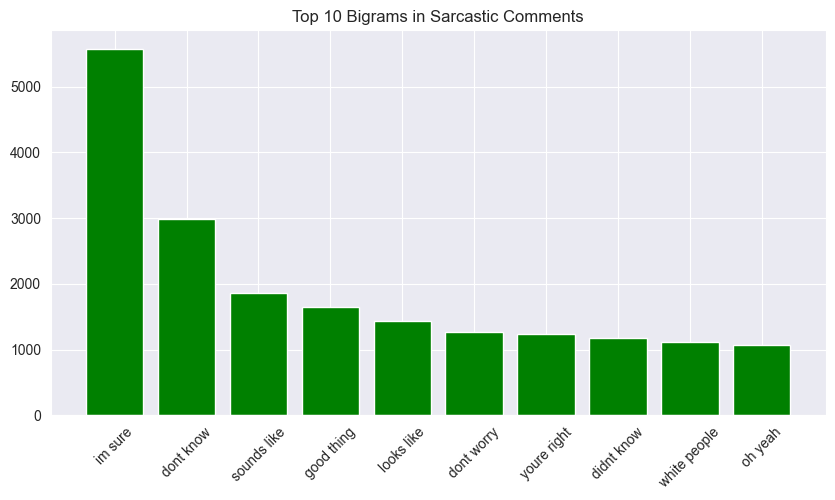

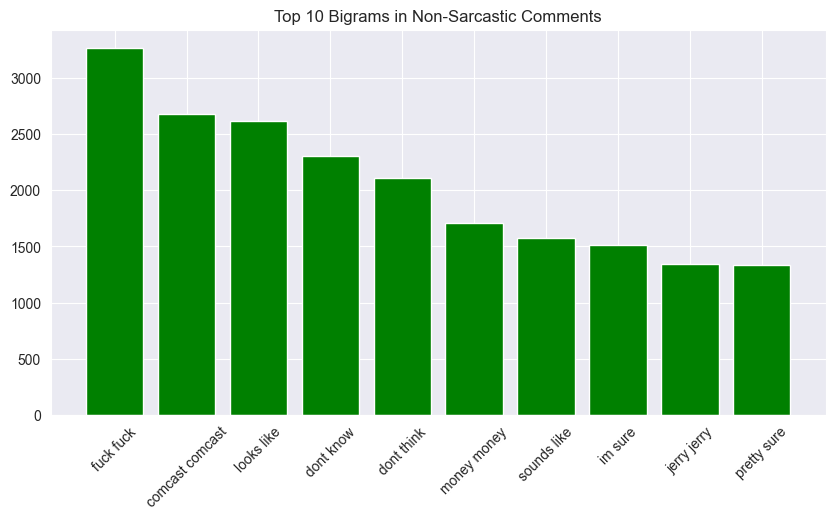

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Define function to extract n-grams (change ngram_range to (1, 2) for bigrams, (1, 3) for trigrams)
def plot_top_ngrams(corpus, ngram_range=(1, 2), n=10, title="Top N-Grams"):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n]
    
    # Plot
    x, y = zip(*top_n_words)
    plt.figure(figsize=(10, 5))
    plt.bar(x, y, color='green')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Apply to sarcastic and non-sarcastic comments
plot_top_ngrams(sarc_data[sarc_data['label'] == 1]['comment_cleaned'], (2, 2), 10, "Top 10 Bigrams in Sarcastic Comments")
plot_top_ngrams(sarc_data[sarc_data['label'] == 0]['comment_cleaned'], (2, 2), 10, "Top 10 Bigrams in Non-Sarcastic Comments")
